In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
# pulling the data from the csv file 
df = pd.read_csv("../../Output/2_zomato_csv/Zomato_Restaurants_All_Consolidated-Types.csv")
df

,Unnamed: 0,Name,Aggregate Rating,Type,Price,Latitude,Longitude,Sensor ID,Sensor
0,0,Soul Cafe,3.0,Cafe,3,-37.813075,144.965281,1,Bourke Street Mall (North)
1,1,Song Tea,3.5,Beverages,1,-37.813810,144.965600,1,Bourke Street Mall (North)
2,2,Sensory Lab - Bourke Street,3.4,Cafe,2,-37.813398,144.964499,1,Bourke Street Mall (North)
3,3,SamSam,4.0,Restaurant,3,-37.812885,144.965210,1,Bourke Street Mall (North)
4,4,Boost Juice,3.7,Beverages,1,-37.813798,144.965849,1,Bourke Street Mall (North)
...,...,...,...,...,...,...,...,...,...
100,115,The Borek Bakehouse,4.4,Bakery,1,-37.807711,144.960005,26,QV Market-Elizabeth St (West)
101,116,Chickcha,3.7,Cafe,2,-37.809073,144.961767,26,QV Market-Elizabeth St (West)
102,117,Damiao Panda Fan 大妙火锅 · 川菜,3.0,Restaurant,3,-37.809614,144.961199,26,QV Market-Elizabeth St (West)
103,118,Mansae Korean BBQ & Bar,4.5,Restaurant,4,-37.809563,144.959607,26,QV Market-Elizabeth St (West)


In [4]:
# check data types
df.dtypes

Unnamed: 0            int64
Name                 object
Aggregate Rating    float64
Type                 object
Price                 int64
Latitude            float64
Longitude           float64
Sensor ID             int64
Sensor               object
dtype: object

In [5]:
# get sensors by name
df["Sensor"].unique()

array(['Bourke Street Mall (North)', 'Flinders St-Spark La',
       'QV Market-Elizabeth St (West)'], dtype=object)

In [6]:
# Put locations into a list for for loop 
locations = ['Bourke Street Mall (North)', 'Flinders St-Spark La', 'QV Market-Elizabeth St (West)']

In [7]:
# Creating an empty list to store the ratings for each sensor
ratings_data = []

In [8]:
for location in locations:
    
    # Locing in on the 3 locations in list
    sens_df = df.loc[df["Sensor"] == location]

    ratings = sens_df['Aggregate Rating']
    ratings_data.append(ratings)
    
    #Calculating the IQR
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = ratings.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determining outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print findings
    print(f"For {location}, the interquartile range of the ratings is {iqr.round(2)}.")
    print(f"For {location} values below {lower_bound.round(2)} could be outliers")
    print(f"For {location} values above {upper_bound.round(2)} could be outliers")

For Bourke Street Mall (North), the interquartile range of the ratings is 0.75.
For Bourke Street Mall (North) values below 2.05 could be outliers
For Bourke Street Mall (North) values above 5.05 could be outliers
For Flinders St-Spark La, the interquartile range of the ratings is 0.73.
For Flinders St-Spark La values below 2.21 could be outliers
For Flinders St-Spark La values above 5.11 could be outliers
For QV Market-Elizabeth St (West), the interquartile range of the ratings is 0.7.
For QV Market-Elizabeth St (West) values below 2.35 could be outliers
For QV Market-Elizabeth St (West) values above 5.15 could be outliers


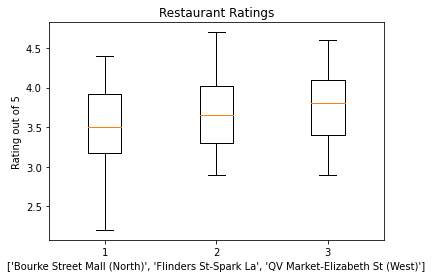

In [10]:
# Giving potential outliers custom style or color 
red_diamond = dict(markerfacecolor='r', marker='D')

fig1, ax1 = plt.subplots()
ax1.set_title('Restaurant Ratings')
ax1.set_ylabel('Rating out of 5')
ax1.set_xlabel(locations)
ax1.boxplot(ratings_data, flierprops = red_diamond)
plt.savefig("../../Output/ratings_boxandwhisper.png")
plt.show()

In [12]:
# Creating an empty list to store the prices for each sensor
prices_data = []

In [13]:
for location in locations:
    
    # Locing in on the 3 locations in list
    sens_df = df.loc[df["Sensor"] == location]

    prices = sens_df['Price']
    prices_data.append(prices)
    
    #Calculating the IQR
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = prices.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determining outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print findings
    print(f"For {location}, the interquartile range of the prices is {iqr.round(2)}.")
    print(f"For {location} values below {lower_bound.round(2)} could be outliers")
    print(f"For {location} values above {upper_bound.round(2)} could be outliers")

For Bourke Street Mall (North), the interquartile range of the prices is 2.0.
For Bourke Street Mall (North) values below -2.0 could be outliers
For Bourke Street Mall (North) values above 6.0 could be outliers
For Flinders St-Spark La, the interquartile range of the prices is 2.0.
For Flinders St-Spark La values below -1.0 could be outliers
For Flinders St-Spark La values above 7.0 could be outliers
For QV Market-Elizabeth St (West), the interquartile range of the prices is 1.0.
For QV Market-Elizabeth St (West) values below 0.5 could be outliers
For QV Market-Elizabeth St (West) values above 4.5 could be outliers


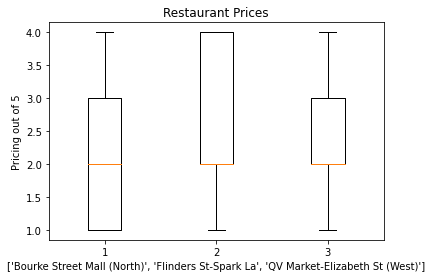

In [12]:
# Giving potential outliers custom style or color 
red_diamond = dict(markerfacecolor='r', marker='D')

fig1, ax1 = plt.subplots()
ax1.set_title('Restaurant Prices')
ax1.set_ylabel('Pricing out of 5')
ax1.set_xlabel(locations)
ax1.boxplot(prices_data, flierprops = red_diamond)
plt.savefig("../../Output/prices_boxandwhisper.png")
plt.show()
